## IMPORT PACKAGES

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt

sys.path.append('../../')
from utils import microarray_utils, clustering_utils, bokeh_ui_utils

In [2]:
full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
num_genes = full_filtered_df.shape[0]
num_genes

19152

In [3]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
17772,YF00035240.t1,10.198801,10.731454,10.373968,10.151175,10.339619,10.030898,9.880376,9.937061,9.887973,...,9.632342,10.592451,10.497255,9.513490,10.610867,10.181338,10.237101,9.968750,9.797893,10.645318
12757,YF00021779.t1,10.471860,10.089735,10.689472,10.516462,10.537922,10.705081,10.426705,10.351512,10.909203,...,11.948275,11.851754,11.944072,12.167589,11.206293,11.461230,10.933206,11.695742,11.406295,11.124213
4978,YF00008177.t1,11.313798,11.062907,11.261208,11.472292,11.116226,11.341554,11.323401,10.886224,11.379540,...,13.191856,12.687572,13.029829,12.656100,12.114715,12.343308,11.573203,12.458780,12.529559,11.702086
10004,YF00017308.t1,9.311019,9.922421,9.616704,9.246789,9.721072,9.625094,9.296898,10.188406,9.676150,...,6.166643,6.075383,5.732060,5.619050,7.213783,6.886975,6.798081,7.950644,7.815914,6.594067
7104,YF00012443.t1,5.334209,5.909625,5.418125,5.092719,5.889504,5.003551,5.497026,5.319819,5.509130,...,7.022688,6.710954,6.439032,8.271117,6.039470,5.841635,6.309659,6.223389,6.112448,5.866319
17171,YF00030811.t1,9.030731,9.742250,9.744270,9.939880,9.537337,10.281837,10.286764,10.259036,10.262842,...,12.752803,11.327052,10.947806,11.483930,10.988902,11.621706,11.587678,11.156596,11.663142,12.311590
16827,YF00029025.t1,12.857105,12.580470,12.659726,13.022283,12.610734,13.012899,13.028615,12.997897,12.903890,...,13.562588,12.476187,12.733392,13.361299,12.087745,12.298970,12.916936,12.102158,12.301360,12.818401
14089,YF00023979.t1,5.531781,6.001889,6.399519,5.634259,5.743624,5.692511,5.287874,5.832944,5.717868,...,6.510419,6.624822,6.414662,6.480839,6.610121,6.552297,6.091449,6.220220,6.604633,5.804664
7527,YF00013117.t1,9.527294,10.181037,9.604179,9.263391,10.153259,9.677996,9.063176,10.800695,10.399714,...,9.150359,8.807336,9.000374,9.132062,9.190281,8.930641,9.474520,9.083469,9.083963,9.708546
7848,YF00013594.t1,10.710360,9.681015,9.650948,11.135257,10.283037,10.817161,10.628421,9.872900,9.839559,...,7.894245,7.401000,6.999242,8.068572,7.384532,7.602912,7.882524,7.139597,7.032584,7.750057


In [4]:
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df)

# LEIDEN CLUSTERING

In [5]:
phases = 'full'

In [6]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_df, 
    metric='minkowski_3.0', 
    n_neighbors=2, 
    resolution_param=0.001, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [7]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

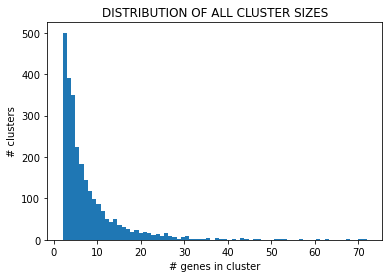

In [8]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

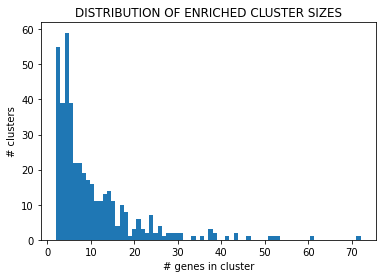

In [9]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [10]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: minkowski_3.0
                       graph: umap_fuzzy_simplicial_set
                         nns: 2
                  clustering: leiden_cpm
                   parameter: 0.001
            silhouette_score: -0.05262236696116537
                  modularity: 0.9991086737353274
                   nclusters: 2607
           mean_cluster_size: 7.346375143843498
         median_cluster_size: 5.0
             sd_cluster_size: 7.30160753997771
          nenriched_clusters: 423
  mean_enriched_cluster_size: 9.907801418439716
median_enriched_cluster_size: 6.0
    sd_enriched_cluster_size: 9.752420352468967
     nenriched_cluster_genes: 4191
                    datetime: 2024-04-02 14:48:23.808385


In [11]:
# for MCL
def leiden_clustering_df_to_csv(df, export_file_path):
    current_module = list(df['label'].values)[0]

    new_cluster = True

    with open(export_file_path, 'w') as f:
        for idx, row in df.iterrows():
            if current_module != row['label']:
                current_module = row['label']
                f.write('\n')
                new_cluster =True

            elif not new_cluster:
                f.write('\t')
            
            f.write(row['TTHERM_ID'])
            new_cluster = False

        f.write('\n')
    
    print(export_file_path, 'successfully exported.')